In [2]:
from tensorflow.keras.datasets.boston_housing import load_data

# 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = load_data(path='boston_housing.npz',
                                                 test_split=0.2,
                                                 seed=777)

57026/57026 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


In [4]:
import numpy as np

np.mean(x_train, axis = 0).shape

(13,)

In [5]:
import numpy as np

# 데이터 표준화
mean = np.mean(x_train, axis = 0)
std = np.std(x_train, axis = 0)

x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

# 훈련 데이터셋과 검증 데이터셋으로 나눕니다.
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size = 0.33,
                                                  random_state= 777)

In [7]:
print(f'train: {x_train.shape}, {y_train.shape}')
print(f'val: {x_val.shape}, {y_val.shape}')
print(f'test: {x_test.shape}, {y_test.shape}')

train: (270, 13), (270,)
val: (134, 13), (134,)
test: (102, 13), (102,)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# 입력 데이터의 형태를 꼭 명시해야 합니다.
# 13차원의 데이터를 입력으로 받고, 64개의 출력을 가지고 첫 번째 Dense층
model.add(Dense(64, activation = 'relu', input_shape = (13, )))
model.add(Dense(32, activation = 'relu')) # 32개의 출력을 가지는 Dense층
model.add(Dense(1)) # 하나의 값을 출력합니다. activation = 'linear'생략 가능

model.compile(optimizer = 'adam', loss = 'mse',
              metrics = ['mae'])

In [9]:
history = model.fit(x_train, y_train, epochs = 300,
                    validation_data = (x_val, y_val))
model.evaluate(x_test, y_test)

Epoch 1/300
9/9 [==============================] - 2s 45ms/step - loss: 556.3970 - mae: 21.8765 - val_loss: 605.4114 - val_mae: 22.3585
Epoch 2/300
9/9 [==============================] - 0s 10ms/step - loss: 530.3086 - mae: 21.3098 - val_loss: 579.9335 - val_mae: 21.8145
Epoch 3/300
9/9 [==============================] - 0s 11ms/step - loss: 505.8264 - mae: 20.7538 - val_loss: 553.4021 - val_mae: 21.2173
Epoch 4/300
9/9 [==============================] - 0s 10ms/step - loss: 479.8663 - mae: 20.1198 - val_loss: 521.8525 - val_mae: 20.4804
Epoch 5/300
9/9 [==============================] - 0s 10ms/step - loss: 448.1296 - mae: 19.3285 - val_loss: 483.1161 - val_mae: 19.5417
Epoch 6/300
9/9 [==============================] - 0s 10ms/step - loss: 409.0909 - mae: 18.3345 - val_loss: 436.1619 - val_mae: 18.3522
Epoch 7/300
9/9 [==============================] - 0s 10ms/step - loss: 361.7188 - mae: 17.0799 - val_loss: 381.5864 - val_mae: 16.8764
Epoch 8/300
9/9 [==============================]

[10.101563453674316, 2.2158100605010986]

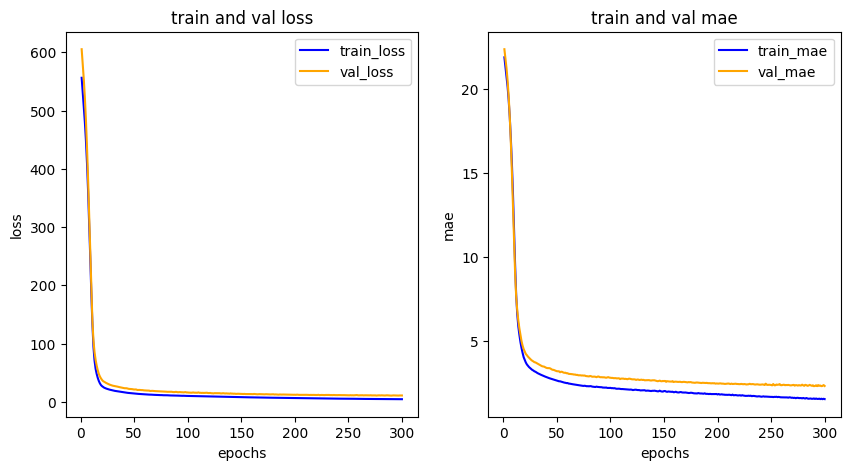

In [11]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

mae = his_dict['mae']
val_mae = his_dict['val_mae']

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, color = 'blue', label = 'train_mae')
ax2.plot(epochs, val_mae, color = 'orange', label = 'val_mae')
ax2.set_title('train and val mae')
ax2.set_xlabel('epochs')
ax2.set_ylabel('mae')
ax2.legend()

plt.show()

In [12]:
results = model.predict(x_test).reshape(102,)
print(results.shape)
print(f'results[0]: {results[0]}')
print(f'y_test[0]: {y_test[0]}')

4/4 [==============================] - 0s 4ms/step
(102,)
results[0]: 21.09002113342285
y_test[0]: 21.4


In [13]:
model.evaluate(x_test, y_test)[1]

4/4 [==============================] - 0s 9ms/step - loss: 10.1016 - mae: 2.2158


2.2158100605010986

In [15]:
from tensorflow.keras.datasets.boston_housing import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as np
from sklearn.model_selection import KFold

(x_train, y_train), (x_test, y_test) = load_data(path='boston_housing.npz',
                                                  test_split = 0.2,
                                                  seed = 777)


# 데이터 표준화
mean = np.mean(x_train, axis = 0)
std = np.std(x_train, axis = 0)

x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

# K-폴드를 진행해봅니다.
k = 3

# 주어진 데이터셋을 k만큼 등분합니다.
# 여기서는 3이므로 학습 데이터셋(404개)을 3등분하여
# 한 개는 검증셋으로, 나머지 두 개는 학습 데이터셋으로 활용합니다.
kfold = KFold(n_splits=k, random_state = 777, shuffle=True)

# K-폴드 과정에서 재사용을 위해 모델을 반환하는 함수를 정의합니다.
def get_model():
  model.add(Dense(64, activation = 'relu', input_shape = (13, )))
  model.add(Dense(32, activation = 'relu'))
  model.add(Dense(1))

  model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

  return model

mae_list = [] # 테스트셋을 평가한 후 결과 mae를 담을 리스트를 선언합니다.

# k번 진행합니다.
for train_index, val_index in kfold.split(x_train):
  # 해당 인덱스는 무작위로 생성됩니다.
  # 무작위로 생성해주는 것은 과대적합을 피할 수 있는 좋은 방법입니다.
  x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
  y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

  # 모델을 불러옵니다.
  model = get_model()

  model.fit(x_train_fold, y_train_fold, epochs = 300,
            validation_data = (x_val_fold, y_val_fold))

  _, test_mae = model.evaluate(x_test, y_test)
  mae_list.append(test_mae)

Epoch 1/300
9/9 [==============================] - 2s 28ms/step - loss: 114.2285 - mae: 9.5028 - val_loss: 37.3258 - val_mae: 4.6740
Epoch 2/300
9/9 [==============================] - 0s 7ms/step - loss: 12.9245 - mae: 2.7937 - val_loss: 24.5842 - val_mae: 4.1635
Epoch 3/300
9/9 [==============================] - 0s 7ms/step - loss: 18.2466 - mae: 3.5650 - val_loss: 12.7578 - val_mae: 2.7760
Epoch 4/300
9/9 [==============================] - 0s 7ms/step - loss: 6.2930 - mae: 1.8838 - val_loss: 16.3522 - val_mae: 2.8593
Epoch 5/300
9/9 [==============================] - 0s 7ms/step - loss: 7.3339 - mae: 1.9854 - val_loss: 12.5832 - val_mae: 2.4410
Epoch 6/300
9/9 [==============================] - 0s 6ms/step - loss: 5.3912 - mae: 1.6902 - val_loss: 10.5358 - val_mae: 2.3959
Epoch 7/300
9/9 [==============================] - 0s 7ms/step - loss: 5.2793 - mae: 1.7330 - val_loss: 10.5192 - val_mae: 2.3054
Epoch 8/300
9/9 [==============================] - 0s 6ms/step - loss: 5.0326 - mae: 

In [16]:
print(f'전체 결과: {mae_list}')
print(f'평균낸 결과를 최종 결과로 사용합니다: {np.mean(mae_list)}')

전체 결과: [2.520900249481201, 2.3799915313720703, 2.556879997253418]
평균낸 결과를 최종 결과로 사용합니다: 2.485923926035563
